# Predict Marketing Sales


The purpose of this report is to find out what factors drive market sales and make predictions given specific variables.

Some limitations:
1. It is prone to overfit
2. We can only use linear regression when the relationship between dependent variables
and independent variables is linear

In [229]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# 1. Loading data

In [16]:
# Load marketing raw data and check data column names 
df = pd.read_csv('Marketing Raw Data.csv')
df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [54]:
# check rows with nulls
df.isnull().sum()
df[df['Revenue'].isnull()]
# the rows where revenue is null don't have other contents
new_df=df.dropna()

# 2. Explore data

In [45]:
new_df.isnull().sum()
print(new_df.shape)

(182, 11)


In [51]:
# investigate each element in columns
for column in new_df:
    unique_val = np.unique(new_df[column])
    if len(unique_val)<20:
        print(column,unique_val)

Month [ 1.  2.  3.  4.  5. 11. 12.]
Month_ID [11. 12. 13. 14. 15. 16. 17.]
Year [2020. 2021.]
Day_Name ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Promo ['No Promo' 'Promotion Blue' 'Promotion Red']


In [142]:
# get an overview of the data before analysis start
new_df.head()

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


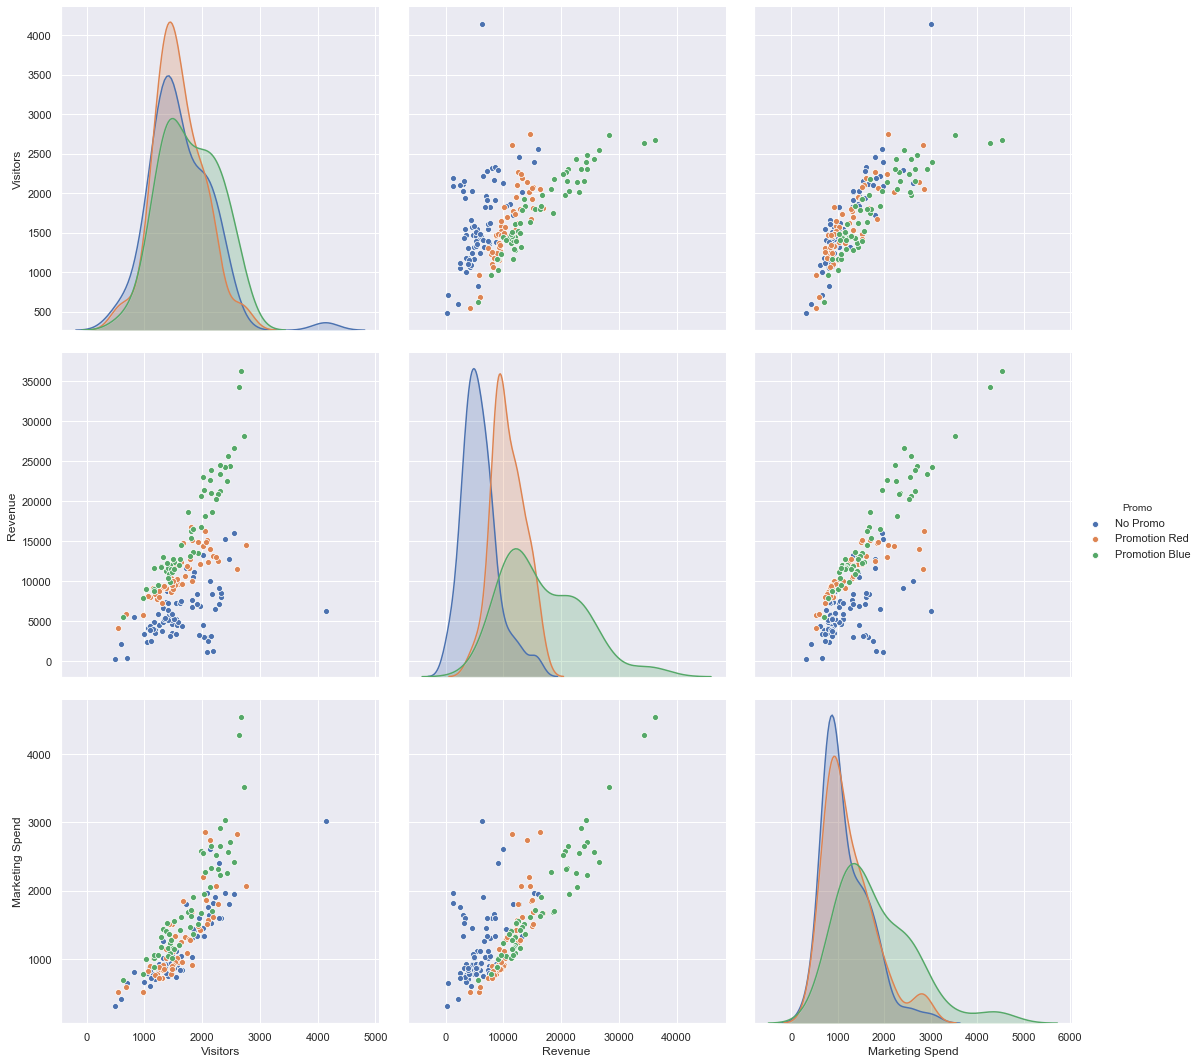

In [67]:
# visualize data using seaborn pairplot
sns.set(style='darkgrid')
g = sns.pairplot(new_df[['Visitors', 'Revenue', 'Marketing Spend','Promo']],hue='Promo',height=5)
# the relationship between visitors and revenue is linear, when there's promotion, the same amount of visitors 
# generate more revenus
# higher marketing spend generates more revenue especially when there's a promotion
# higher marketing spend attracts more customers but not much different results for each type of promotion

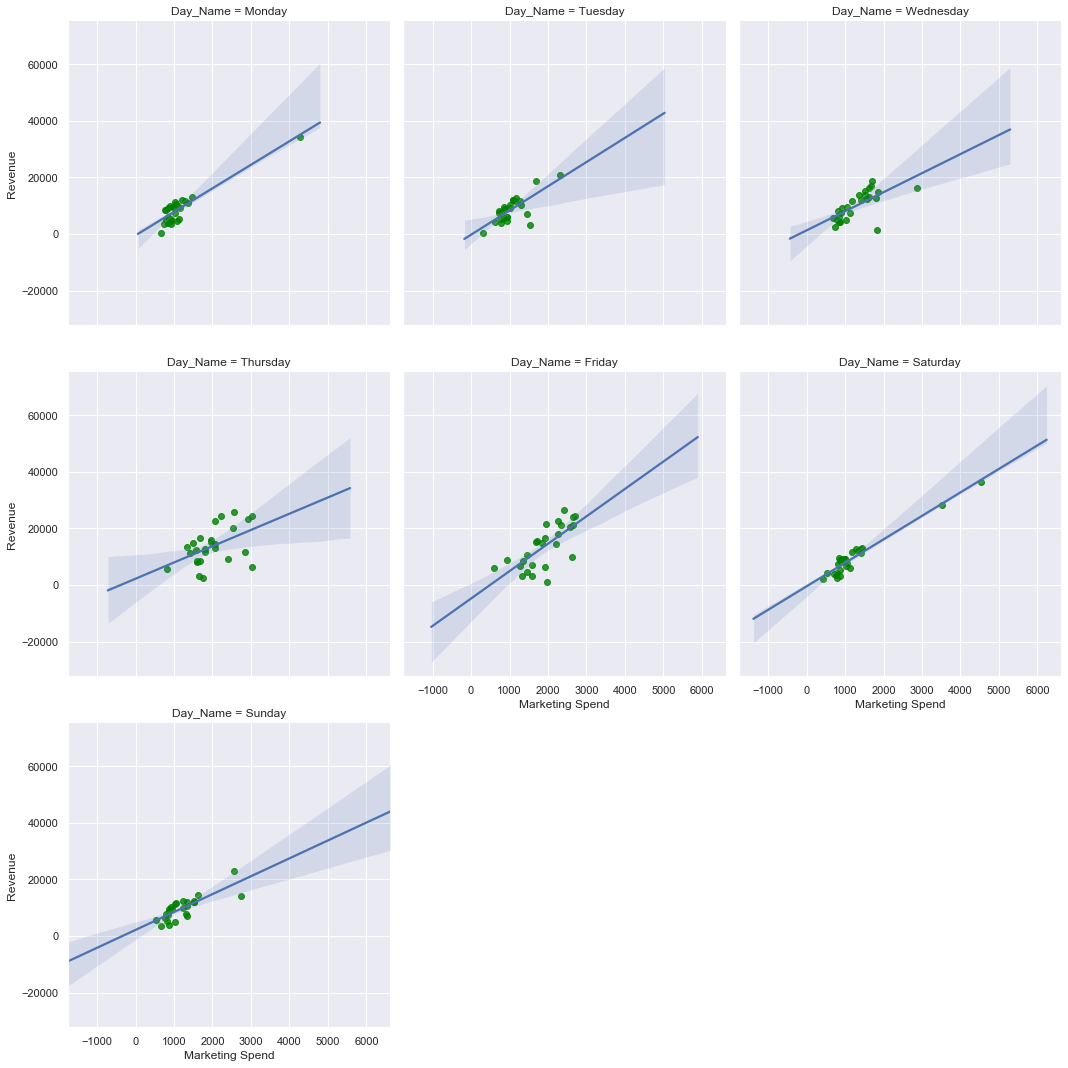

In [83]:
# visualize the relationship between marketing spend and revenue by day
g = sns.lmplot(x='Marketing Spend',y='Revenue',data=new_df,col='Day_Name',col_wrap=3,scatter_kws={'color':'green'})

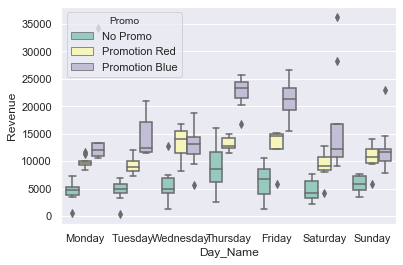

In [86]:
# investigate the distribution of revenue by categorical data
g = sns.boxplot(x='Day_Name',y='Revenue',data=new_df,hue='Promo',palette='Set3')

In [145]:
# remove outliers
use_df=new_df[new_df['Revenue']<27000]

In [146]:
use_df.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [147]:
# selecting only useful columns
use_df = use_df[['Day_Name','Month','Visitors','Marketing Spend','Promo','Revenue']]

In [148]:
# change categorical data into numerical values
use_df = pd.get_dummies(use_df)

In [149]:
use_df.head()

,Month,Visitors,Marketing Spend,Revenue,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,11.0,707.0,651.375,465.0,0,1,0,0,0,0,0,1,0,0
1,11.0,1455.0,1298.250,10386.0,0,0,0,0,0,1,0,0,0,1
2,11.0,1520.0,1559.375,12475.0,0,0,0,0,0,0,1,0,1,0
3,11.0,1726.0,1801.750,11712.0,0,0,0,0,1,0,0,1,0,0
4,11.0,2134.0,2614.500,10000.0,1,0,0,0,0,0,0,1,0,0


# 3. Feature selection

In [140]:
# two ways for feature selection
# 1. Correlation
# 2. Feature importance

In [128]:
# running correlation
hm=use_df[['Visitors','Marketing Spend','Revenue']].corr()

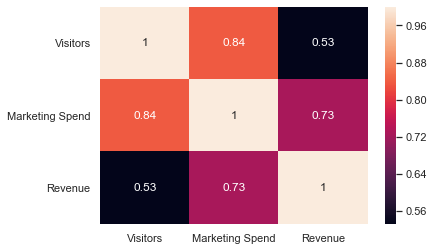

In [163]:
g = sns.heatmap(hm,annot=True)

In [319]:
# 1. split data into two sets
# 2. run a tree based estimator
# 3. run feature importance

In [321]:
df_x.head()

,Month,Visitors,Marketing Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,11.0,707.0,651.375,0,1,0,0,0,0,0,1,0,0
1,11.0,1455.0,1298.250,0,0,0,0,0,1,0,0,0,1
2,11.0,1520.0,1559.375,0,0,0,0,0,0,1,0,1,0
3,11.0,1726.0,1801.750,0,0,0,0,1,0,0,1,0,0
4,11.0,2134.0,2614.500,1,0,0,0,0,0,0,1,0,0


In [330]:
df_x = use_df.drop(['Revenue'],axis=1).values
df_y = use_df['Revenue']
df_y = df_y.astype(int)

AttributeError: 'Series' object has no attribute 'columns'

In [332]:
# run decision tree
dt = DecisionTreeClassifier(random_state=15,criterion='entropy',splitter='best',max_depth=10)
dt.fit(df_x,df_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [202]:
col=[]
fi=[]

for i,columns in enumerate(use_data.drop('Revenue',axis=1)):
    f = dt.feature_importances_[i]
    col.append(columns)
    fi.append(f)


print(n)
combine=zip(col,fi)

['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name', 'Visitors', 'Marketing Spend', 'Promo']


In [203]:
fi_df = pd.DataFrame(combine,columns=['Feature','Feature Importance'])

In [207]:
fi_df.sort_values(by='Feature Importance',ascending=False).reset_index()

,index,Feature,Feature Importance
0,2,Week_ID,0.362707
1,0,Date,0.223399
2,1,Week,0.206789
3,5,Year,0.026330
4,3,Month,0.021131
5,9,Promo,0.016413
6,7,Visitors,0.015848
7,6,Day_Name,0.015423
8,4,Month_ID,0.012799
9,8,Marketing Spend,0.009244


# 4. Splitting train test dataset

In [214]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=15)

In [215]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=15)

# 5. Linear regression

In [227]:
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train,y_train)

y_pred = reg.predict(x_train)
pd.DataFrame(zip(y_train,y_pred))


,0,1
0,14957.0,13100.767451
1,2409.0,3081.856383
2,292.0,1673.049417
3,21428.0,18116.362452
4,12425.0,13271.786078
5,3021.0,8795.516188
6,13281.0,7612.504432
7,6908.0,7214.087727
8,11650.0,12491.956601
9,22587.0,19639.738660


# 6. Evaluate model

In [252]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from math import sqrt

In [250]:
y_test_pred = reg.predict(x_test)

In [333]:
# model accuracy on train set
# r square measures how close the data are to fitted regression line
reg.score(x_train,y_train)
r2_score(y_train,y_pred)
# model accuracy on test set
reg.score(x_test,y_test)
# Root mean square error RMSE
# measure how spread your residuals are
sqrt(mean_squared_error(y_train,y_pred))
sqrt(mean_squared_error(y_test,y_test_pred))
# model explains 79% of the training data, 75% of the testing data

2304.381096326842

In [254]:
# mean absolute error MAE
mean_absolute_error(y_train,y_pred)
mean_absolute_error(y_test,y_test_pred)

1673.5555217081733

In [256]:
# coefficient
# coefficients are the weights
reg.coef_
# intercept
# intercept is the expected mean value when x=0
reg.intercept_

4218.951571092533

# 7. Visualization

Text(0, 0.5, 'Predictions')

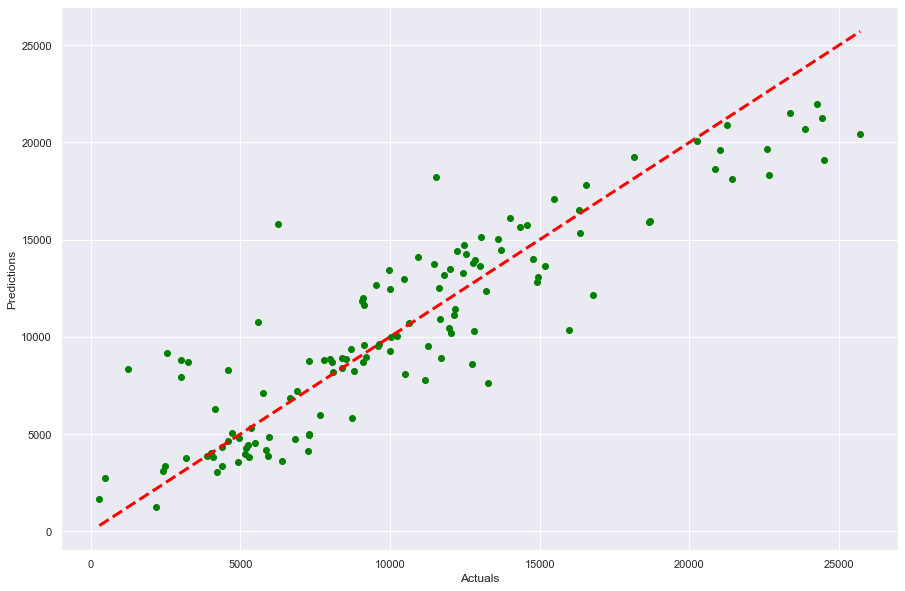

In [266]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred,c='green')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],'k--',lw=3,c='red')
plt.xlabel('Actuals')
plt.ylabel('Predictions')

Text(0.5, 1.0, 'Actuals Vs Predicted')

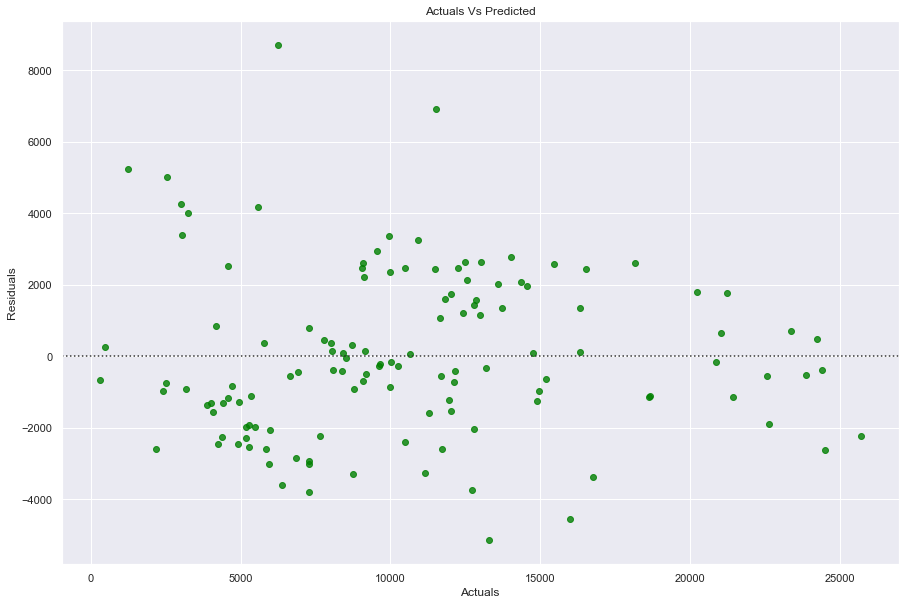

In [270]:
plt.figure(figsize=(15,10))
sns.residplot(y_train,y_pred,color='green')

plt.xlabel('Actuals')
plt.ylabel('Residuals')
plt.title('Actuals Vs Predicted')

# 8. Using linear models to predict values

In [276]:
# passing coeff into table
coeff = reg.coef_
coeff.shape
# reshape
coeff = coeff.reshape(-1,13)
# creating dataframe
coeff_df = pd.DataFrame(coeff,columns=[use_df.drop(['Revenue'],axis=1)])

In [277]:
coeff_df

,Month,Visitors,Marketing Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,-1.363236,1.113193,3.471513,1074.932057,-243.776634,-816.200817,-495.499373,793.427847,67.003467,-379.886547,-4272.607736,3799.326365,473.281371


In [305]:
# variables
Day='Day_Name_Friday'
Visitor = 5687
Marketing_Spend=4584
Promo='Promo_Promotion Red'

# y=a+bx+...
pred1 = (reg.intercept_)+(coeff_df[Day].values[0]*1)+(coeff_df[['Visitors']].values[0] *Visitor)
+(coeff_df[['Marketing Spend']].values[0]*Marketing_Spend)+(coeff_df[Promo].values[0]*1)

array([16386.69904812])

In [298]:
coeff_df

,Month,Visitors,Marketing Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,-1.363236,1.113193,3.471513,1074.932057,-243.776634,-816.200817,-495.499373,793.427847,67.003467,-379.886547,-4272.607736,3799.326365,473.281371


In [299]:
print(coeff_df[['Visitors']])

   Visitors
0  1.113193


In [ ]:
# campaign optimization